In [1]:
import numpy as np
import IM_rank_correlations as IMR

In [42]:
ranks_matrix = IMR.ranks(IMR.scores_matrix, IMR.measures_arr);
measures_arr = ranks_matrix.measures_arr;
measures_dict = ranks_matrix.measures_dict;

In [43]:
ranks_matrix.compute_correlation()

In [45]:
def find_redundant(measures_arr):
#     print(len(measures_arr))
    for i in range(len(measures_arr)):
        for j in range(len(measures_arr)):
            if (i > j):
                if (np.around(ranks_matrix.corr_spearman[i][j], 3) == 1):
#                     print(measures_arr[i],measures_arr[j]);
                    return(j);

# find_redundant(measures_arr)

while find_redundant(measures_arr):
    i = find_redundant(measures_arr);
    measures_dict, measures_arr = ranks_matrix.remove_outliers(i);

In [ ]:
def find_outlier(clusters):
    arr = []
    for i in range(len(clusters)):
        if len(clusters[i]) == 1:
            arr.append(clusters[i]);
    return np.array(arr);


# while len(find_outlier(clusters)):
#     idx_outliers = find_outlier(clusters);
#     print(measures_arr[idx_outliers]);
#     measures_dict, measures_arr = ranks_matrix.remove_outliers(idx_outliers);
#     clusters = ranks_matrix.form_clusters(n_clusters);

In [48]:
n_clusters = 18;
clusters = ranks_matrix.form_clusters(n_clusters);
for cluster in clusters:
    print(len(cluster), cluster);
    print(measures_arr[cluster])

1 [0]
['recall']
2 [ 1 21]
['mutual_information' 'normalized_mutual_information']
1 [2]
['negative_reliability']
3 [ 3  9 11]
['accuracy' 'relative_risk' 'yules_y']
1 [4]
['support']
2 [ 5 31]
['confidence_causal' 'confirmed_confidence_causal']
2 [ 6 12]
['kulczynsky_1' 'cosine']
1 [7]
['coverage']
1 [8]
['prevalence']
3 [10 19 23]
['novelty' 'klosgen' 'two_way_support']
4 [13 14 18 30]
['least_contradiction' 'confirm_descriptive' 'laplace_correction'
 'example_counterexample_rate']
1 [15]
['confirm_causal']
4 [16 28 29 32]
['conviction' 'kappa' 'putative_causal_dependency' 'collective_strength']
4 [17 20 22 34]
['information_gain' 'zhang' 'one_way_support' 'dependency']
1 [24]
['implication_index']
2 [25 33]
['gini_index' 'j_measure']
1 [26]
['goodman_kruskal']
1 [27]
['leverage']


In [9]:
len(ranks_matrix.measures_arr)

16

In [7]:
#removing all measures except the ones in cluster 1 (16 measures)
to_remove = np.empty(0, int);

for cluster in clusters:
    if not (len(cluster) == 16):
        to_remove = np.append(to_remove, cluster);

measures_dict, measures_arr = ranks_matrix.remove_outliers(to_remove);

In [ ]:
misc_cluster = np.array([], int);
misc_cluster = np.append(misc_cluster, clusters[2]);
misc_cluster = np.append(misc_cluster, clusters[4]);
misc_cluster = np.append(misc_cluster, clusters[5]);
misc_cluster = np.append(misc_cluster, clusters[6]);
misc_cluster = np.append(misc_cluster, clusters[7]);
misc_cluster = np.append(misc_cluster, clusters[8]);
misc_cluster = np.append(misc_cluster, clusters[9]);

clusters_new = [];
clusters_new.append(clusters[0]);
clusters_new.append(clusters[1]);
clusters_new.append(clusters[3]);
clusters_new.append(misc_cluster);

clusters_new = np.array(clusters_new);
clusters = clusters_new;

# print(clusters_new)
print([measures_arr[clusters_new[i]] for i in range(len(clusters_new))])

In [49]:
import measure_classification as mc;
import compute_invariance as compute_invariance;


In [54]:
property_dict = compute_invariance.compute_property_vectors(measures_dict);
X,Y = mc.initialize_X_Y(measures_arr, property_dict);

In [55]:
X = mc.form_X(property_dict, measures_dict, X);
Y = mc.assign_clusters_to_Y(clusters, Y);
X.shape

(35, 119)

In [56]:
# import scipy.spatial.distance as ssd
# import scipy.misc as sm;
# import numpy as np;

# for c in range(len(clusters)):
#     n= sm.comb(len(clusters[c]),2);
#     arr = np.zeros(n, float);
# #     print(c)
#     k=0;
#     for i in clusters[c]:
#         for j in clusters[c]:
#             if (i > j):
# #                 print(measures_arr[i], measures_arr[j]);
# #                 print(X[i], X[j])
#                 arr[k] = ssd.hamming(X[i], X[j]);
#                 k += 1;
#     print(np.average(arr))
# # print(measures_arr[clusters[0][1]], measures_arr[clusters[0][2]])
# # ssd.jaccard(X[clusters[0][1]], X[clusters[0][4]])

In [57]:
predictions, tree_classifier = mc.classify_decision_tree(X,Y, criterion='entropy');
print(tree_classifier.score(X,Y))

0.485714285714


In [58]:
mc.export_to_pdf(tree_classifier, n_clusters, len(measures_arr))

In [62]:
# measures_arr[(X[:,0] == 0) & ((X[:,1] == 0)) & ((X[:,2] == 0)) & ((X[:,4] == 0)) & ((X[:,5] == 0)) & ((X[:,6] == 0)) & ((X[:,7] == 0))]
measures_arr[(X[:,36] == 1) & ((X[:,48] == -1)) & ((X[:,111] == -1))]

array(['negative_reliability', 'confidence_causal', 'relative_risk',
       'confirm_causal', 'conviction', 'klosgen', 'zhang',
       'one_way_support', 'leverage', 'putative_causal_dependency',
       'confirmed_confidence_causal', 'j_measure', 'dependency'], 
      dtype='<U29')

In [ ]:
# np.around(ranks_matrix.corr_spearman[measures_dict['example_counterexample_rate'], measures_dict['laplace_correction']], 3)

# X = np.delete(X, 3, axis=1)

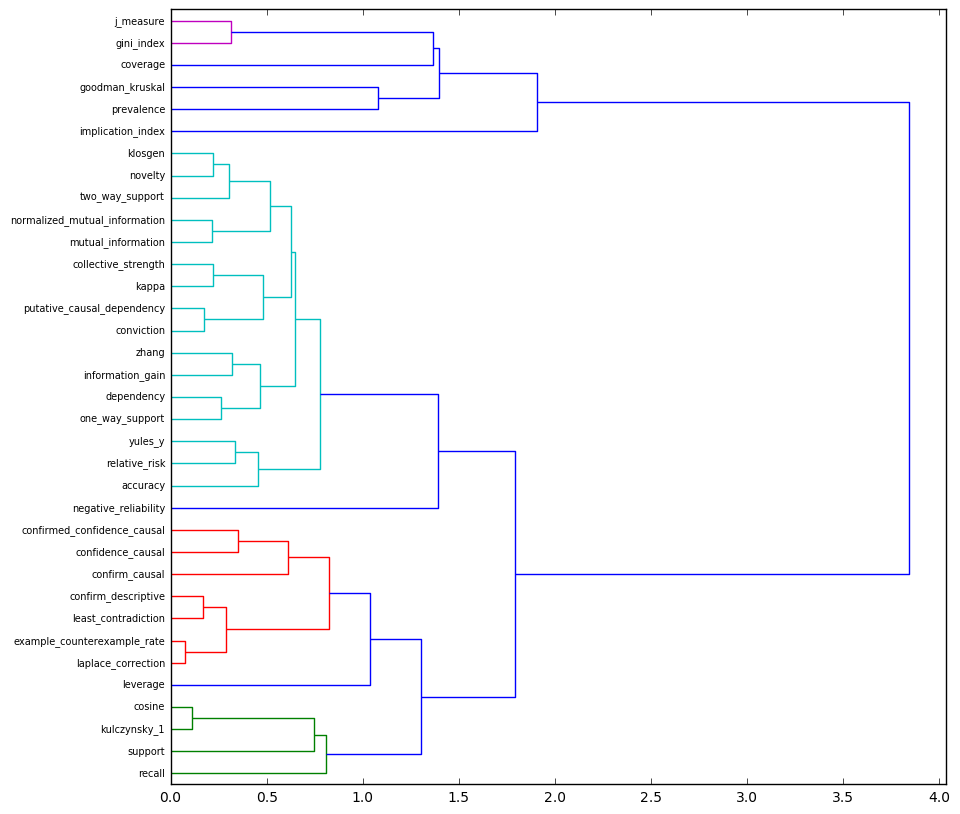

In [46]:
ranks_matrix.show_dendrogram()

In [21]:
a = np.empty((len(X[0,:]),len(clusters)), float);
for p in range(len(clusters)):
    for i in range(len(X[0,:])):
        a[i][p] = np.sum(X[clusters[p],i])/len(clusters[p]);
#         print(a[i][p])
a = (1 + a)/2;

In [22]:
a.shape

(119, 8)

In [23]:
import matplotlib.pyplot as plt

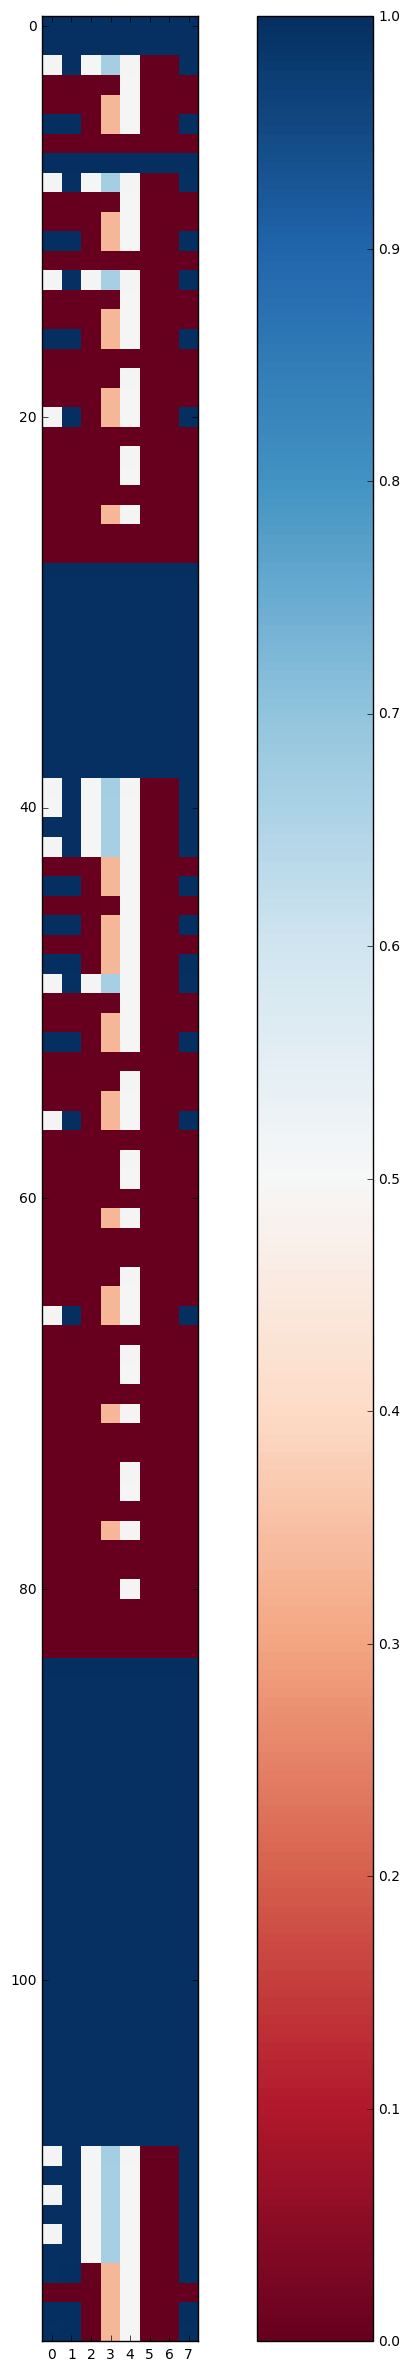

In [26]:
fig, ax = plt.subplots(figsize=[15,30], ncols=1, nrows=1);
plt.imshow(a, interpolation='none', cmap=plt.cm.RdBu);
plt.colorbar();
plt.show()

In [ ]:
int(sm.comb(1,1))